In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split


%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False



In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [8]:
import seaborn as sns

In [15]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)


<AxesSubplot:>

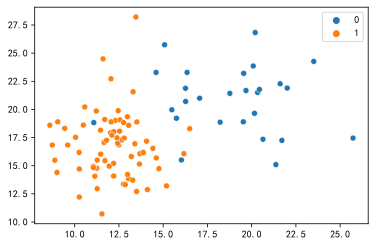

In [14]:
sns.scatterplot(x=cancer.data[300:400, 0], y=cancer.data[300:400, 1], hue=cancer.target[300:400])   # hue=cancer.target[300:400]：自动根据标签改颜色

In [16]:
#从病灶造影图片，提取了10个关键属性
#radius:半径
#texture:纹理 
#primeter:周长 
#area：面积
#smoothness:平滑度，半径的变化幅度
#compactness:密实度，周长的平方除以面积的商再减一
#concavity:凹度，凹陷部分轮廓的严重程度
#concave points:凹点，凹陷轮廓的数量
#symmetry:对称性
#fractal dimension:分形维度


In [17]:
X = cancer.data[300:400,0:2]   # 300-400行0-2列
y = cancer.target[300:400]

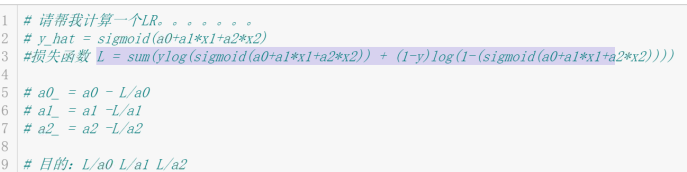
偏导
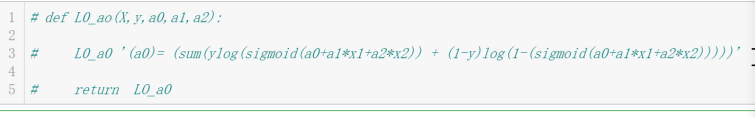

In [18]:
# 导入逻辑回归库
from sklearn.linear_model import LogisticRegression

In [20]:
# 创建模型，实例化
LR = LogisticRegression(
    penalty='l2',   # L2正则项
    tol=0.0001,     # 收敛域
    C=1,          # 正则强度
    fit_intercept=True, # 截距项：a0
    max_iter=100,       # 最大迭代次数
    solver='lbfgs',      # 梯度下降算子，方法：L2用默认lbfgs，L1用libliner
)
LR.fit(X, y)

LogisticRegression(C=1)

In [21]:
LR.score(X,y)

0.96

In [27]:
LR.coef_[0][1]  # 直线的系数   a_1,a_2
# LR.intercept_   # 截距项 a_0

-0.32625414321960977

In [34]:
a_0 = LR.intercept_
a_1 = LR.coef_[0][0]
a_2 = LR.coef_[0][1]

# 直线：a_0+a_1*x1+a_2*x2=0

x_1 = np.linspace(10,20,30)
x_2 = -(a_0+a_1*x_1)/a_2

D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


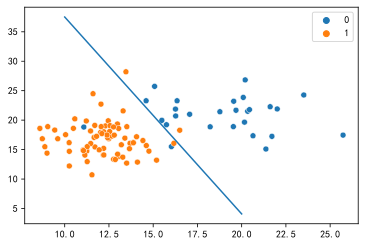

In [36]:
sns.scatterplot(x=cancer.data[300:400, 0], y=cancer.data[300:400, 1], hue=cancer.target[300:400])   # hue=cancer.target[300:400]：自动根据标签改颜色
sns.lineplot(x_1, x_2)
plt.show()

In [49]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data[:,0:2], cancer.target, test_size=0.2)

In [65]:
LR1 = LogisticRegression(
    penalty='l2',   # L2正则项
    tol=0.0001,     # 收敛域
    C=1,          # 正则强度
    fit_intercept=True, # 截距项：a0
    max_iter=100,       # 最大迭代次数
    solver='lbfgs',      # 梯度下降算子，方法：L2用默认lbfgs，L1用libliner
).fit(x_train, y_train)


LR2 = LogisticRegression(
    penalty='l1',   # L2正则项
    tol=0.0001,     # 收敛域
    C=1,          # 正则强度
    fit_intercept=True, # 截距项：a0
    max_iter=100,       # 最大迭代次数
    solver='liblinear',      # 梯度下降算子，方法：L2用默认lbfgs，L1用libliner
).fit(x_train, y_train)



D:\Software\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


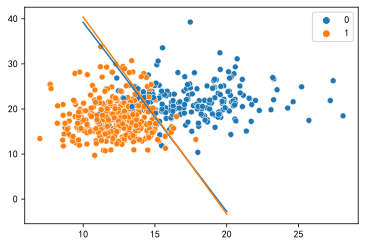

In [68]:
a_0 = LR1.intercept_
a_1 = LR1.coef_[0][0]
a_2 = LR1.coef_[0][1]

# 直线：a_0+a_1*x1+a_2*x2=0

x_1 = np.linspace(10,20,30)
x_2 = -(a_0+a_1*x_1)/a_2


a0 = LR2.intercept_
a1 = LR2.coef_[0][0]
a2 = LR2.coef_[0][1]

# 直线：a_0+a_1*x1+a_2*x2=0

x1 = np.linspace(10,20,30)
x2 = -(a0+a1*x1)/a2


sns.scatterplot(x=cancer.data[:, 0], 
                y=cancer.data[:, 1], 
                hue=cancer.target)   # hue=cancer.target[300:400]：自动根据标签改颜色
sns.lineplot(x_1, x_2)
sns.lineplot(x1, x2)
plt.show()

In [69]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

In [72]:
lr = LogisticRegression(
    penalty='l2',   # L2正则项
    tol=0.0001,     # 收敛域
    C=1,          # 正则强度
    fit_intercept=True, # 截距项：a0
    max_iter=100,       # 最大迭代次数
    solver='lbfgs',      # 梯度下降算子，方法：L2用默认lbfgs，L1用libliner
)
lr.fit(x_train, y_train)

D:\Software\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [73]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [74]:
lr.score(x_train, y_train)

0.9516483516483516

In [75]:
lr.score(x_test, y_test)

0.9473684210526315

In [76]:
lr.predict(x_train)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,

In [92]:
a = (y_train == lr.predict(x_train))
Counter(a)
1-(22 / 455)

0.9516483516483516

In [94]:
lr.predict_proba(x_train)  # 查看概率

array([[8.79401052e-03, 9.91205989e-01],
       [8.28749353e-03, 9.91712506e-01],
       [2.60756728e-03, 9.97392433e-01],
       [5.63370964e-02, 9.43662904e-01],
       [9.72245768e-01, 2.77542320e-02],
       [9.99999966e-01, 3.40973056e-08],
       [1.60763153e-03, 9.98392368e-01],
       [1.55671882e-02, 9.84432812e-01],
       [1.00000000e+00, 6.44973771e-20],
       [1.29096801e-02, 9.87090320e-01],
       [1.24951360e-03, 9.98750486e-01],
       [2.15343683e-03, 9.97846563e-01],
       [4.42386567e-03, 9.95576134e-01],
       [2.66310659e-03, 9.97336893e-01],
       [9.99999995e-01, 4.63486636e-09],
       [7.54819132e-01, 2.45180868e-01],
       [1.54145983e-01, 8.45854017e-01],
       [4.53210423e-03, 9.95467896e-01],
       [2.84813667e-03, 9.97151863e-01],
       [8.66672982e-04, 9.99133327e-01],
       [7.90163386e-01, 2.09836614e-01],
       [1.07940672e-01, 8.92059328e-01],
       [3.09911881e-03, 9.96900881e-01],
       [6.14462283e-03, 9.93855377e-01],
       [9.986372